In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import csv
import sys
import numpy as np
# import cugraph

In [2]:
maxInt = sys.maxsize
while True:
    # decrease the maxInt value by factor 10
    # as long as the OverflowError occurs.
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [3]:
# Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category

#Read Data from csv
# filename = "./data/Data_API.csv"
# with open(filename,'r', encoding='UTF-8') as f:
#      reader = csv.reader(f)
#      header = next(reader)
#      seller_address_list = []
#      buyer_address_list = []
#      category_list=[]
#      for row in reader:
#          seller_address_list.append(row[3])
#          buyer_address_list.append(row[5])
#          category_list.append(row[23])
# edge_list = list(zip(seller_address_list, buyer_address_list))

In [3]:
data_api_path="./data/Data_API_mapped.csv"
art_path="./data/Art_mapped.csv"
collectible_path="./data/Collectible_mapped.csv"
games_path="./data/Games_mapped.csv"
metaverse_path="./data/Metaverse_mapped.csv"
utility_path="./data/Utility_mapped.csv"
other_path="./data/Other_mapped.csv"

In [10]:
filepath = utility_path
with open(filepath, 'r', encoding='UTF-8') as f:
     reader = csv.reader(f)
     seller_address_list = []
     buyer_address_list = []
     for row in reader:
         seller_address_list.append(row[0])
         buyer_address_list.append(row[1])
edge_list = list(zip(seller_address_list, buyer_address_list))

In [11]:
G = nx.MultiDiGraph()
G.add_edges_from(edge_list)

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 0,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 24,
 25,
 26,
 0,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 0,
 0,
 0,
 39,
 40,
 41,
 42,
 43,
 0,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 55,
 56,
 1,
 0,
 1,
 2,
 2,
 3,
 4,
 5,
 11,
 12,
 0,
 0,
 57,
 58,
 3,
 59,
 4,
 5,
 60,
 61,
 62,
 63,
 64,
 1,
 2,
 3,
 0,
 6,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 0,
 74,
 75,
 76,
 3,
 0,
 4,
 13,
 14,
 0,
 6,
 7,
 8,
 9,
 10,
 11,
 1,
 2,
 0,
 1,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 12,
 13,
 14,
 15,
 0,

In [12]:
#1. Ouput the number of nodes and edges
nodes = G.number_of_nodes()
edges = G.number_of_edges()
print("1. Number of nodes and edges: ",nodes,"  ",edges)

1. Number of nodes and edges:  3459    7799


In [13]:
#2. Ouput the average in-degree and out-degree
sum_of_in_degree=0
in_degree_list=[]
sum_of_out_degree=0
out_degree_list=[]
degree_list=[]
for node in G.nodes:
    temp_in=G.in_degree(node)
    temp_out=G.out_degree(node)
    sum_of_in_degree+=temp_in
    sum_of_out_degree+=temp_out

    in_degree_list.append(temp_in)
    out_degree_list.append(temp_out)
    degree_list.append(temp_in+temp_out)

avg_out_degree=sum_of_out_degree/nodes
avg_in_degree=sum_of_in_degree/nodes
print("2. Average in-degree: ",avg_in_degree)
print("3. Average out-degree: ",avg_out_degree)
#3. Ouput the average degree(i.e., sum of in-degree and out-degree)
avg_degree=(sum_of_in_degree+sum_of_out_degree)/nodes
print("5. Average degree: ",avg_degree)

2. Average in-degree:  2.2546978895634577
3. Average out-degree:  2.2546978895634577
5. Average degree:  4.5093957791269155


0


Text(0, 0.5, 'Count,P(K)*n')

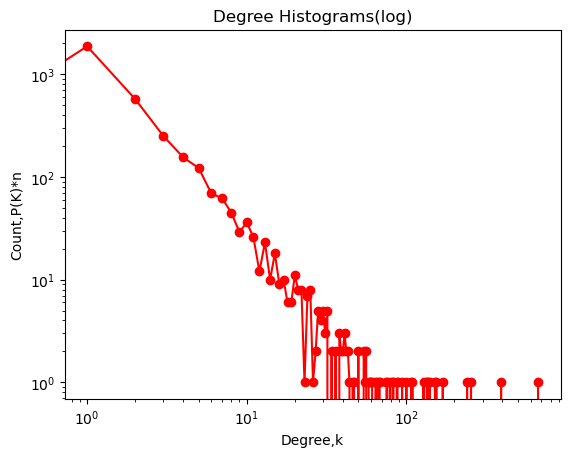

In [14]:
degree_counts = Counter(degree_list)
degree_freq = [degree_counts.get(i,0) for i in range(max(degree_counts)+1)]
degrees = range(len(degree_freq))

#log-log
print(degree_counts.get(0,0))
plt.title("Degree Histograms(log)")
plt.loglog(degrees,degree_freq,'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Number of paths')

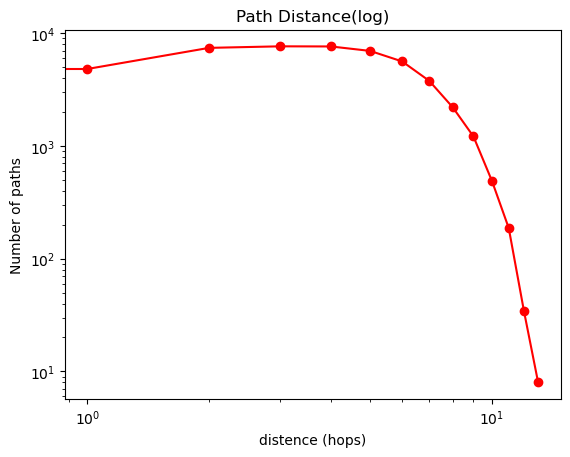

In [15]:
# compute distance
dis_seq = []
path_len = nx.all_pairs_shortest_path_length(G)

for s, s2t in path_len:
  dis_seq += list(s2t.values())
# for i,node1 in enumerate(G.nodes):
#     for node2 in G.nodes:
#         if nx.has_path(G,node1,node2):
#             dis=nx.shortest_path_length(G,node1,node2)
#             dis_seq.append(dis)
#     print("-----{} nodes----".format(i))

dis_counts = Counter(dis_seq)
dis_freq = [dis_counts.get(d,0) for d in range(max(dis_counts)+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance(log)")
plt.loglog(dis,dis_freq,'ro-')
plt.xlabel('distence (hops)')
plt.ylabel('Number of paths')

In [16]:
#Calculate average path
avg_path=sum(dis_seq)/(len(dis_seq)-nodes)
print(avg_path)

4.251170533763396


In [23]:
G_weighted=nx.DiGraph()
for u,v in G.edges():
    if G_weighted.has_edge(u,v):
        G_weighted[u][v]['weight'] += 1
    else:
        G_weighted.add_edge(u, v, weight=1)

In [24]:
coef = nx.clustering(G_weighted)
coef = np.array(list(coef.values()))

degree_unique = np.unique(degree_list)
coef_degree_list = []

for d in np.unique(degree_unique):
  mask_d = (degree_list == d)
  coef_degree = coef[mask_d].mean()
  coef_degree_list.append(coef_degree)

Text(0, 0.5, 'Ck (Clustering coefficient)')

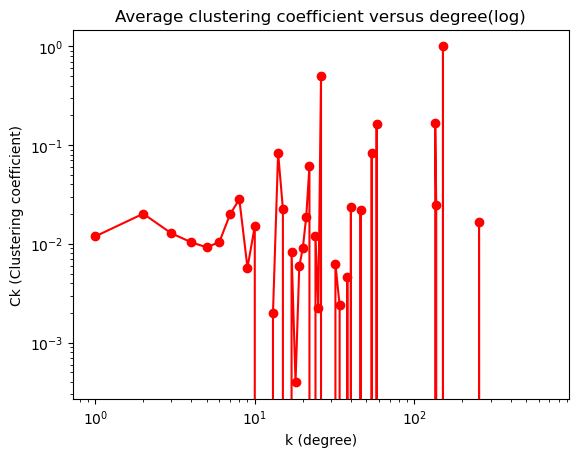

In [25]:
#log-log
plt.title("Average clustering coefficient versus degree(log)")
plt.loglog(degree_unique,coef_degree_list,'ro-')
plt.xlabel('k (degree)')
plt.ylabel('Ck (Clustering coefficient)')

0


Text(0, 0.5, 'number of connected components')

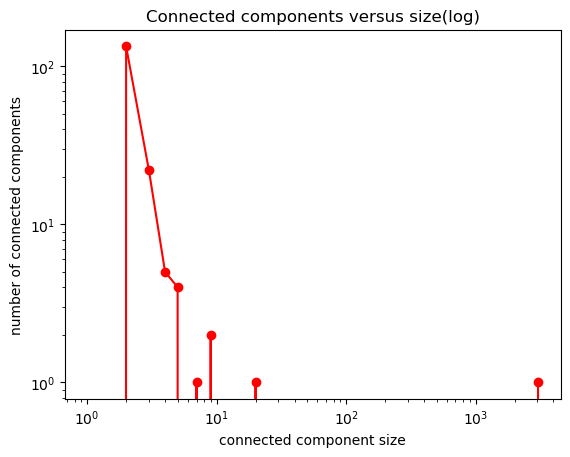

In [20]:
G_undirected=G.to_undirected()
component_list = list(nx.connected_components(G_undirected))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

In [32]:
out_degree_centrality = nx.out_degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)

print("Out-degree centrality:", out_degree_centrality)
print("In-degree centrality:", in_degree_centrality)

Out-degree centrality: {'0': 0.0002891844997108155, '1': 0.0002891844997108155, '2': 0.0002891844997108155, '3': 0.0, '4': 0.0037593984962406013, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.009832272990167727, '10': 0.0002891844997108155, '11': 0.0, '12': 0.000578368999421631, '13': 0.0, '14': 0.0, '15': 0.0031810294968189702, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0002891844997108155, '20': 0.0, '21': 0.11336032388663966, '22': 0.0, '23': 0.0017351069982648928, '24': 0.0, '25': 0.0, '26': 0.0002891844997108155, '27': 0.0, '28': 0.031521110468478886, '29': 0.000578368999421631, '30': 0.0, '31': 0.0, '32': 0.0, '33': 0.0, '34': 0.0002891844997108155, '35': 0.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 0.0, '42': 0.0, '43': 0.029786003470213995, '44': 0.0, '45': 0.0, '46': 0.0002891844997108155, '47': 0.0, '48': 0.0, '49': 0.005205320994794678, '50': 0.0, '51': 0.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.000578368999421631, '56': 0.002602660497397339, '57': 0.0

In [33]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality:", betweenness_centrality)

Betweenness centrality: {'0': 8.36518656959258e-08, '1': 8.36518656959258e-08, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 4.18259328479629e-08, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0, '32': 0.0, '33': 0.0, '34': 0.0, '35': 0.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 0.0, '42': 0.0, '43': 4.140767351948327e-06, '44': 0.0, '45': 0.0, '46': 2.509555970877774e-07, '47': 0.0, '48': 0.0, '49': 5.562849068779066e-06, '50': 0.0, '51': 0.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.0, '56': 1.212952052590924e-06, '57': 0.0, '58': 0.0, '59': 1.5057335825266644e-06, '60': 0.0, '61': 0.0, '62': 0.0, '63': 0.0, '64': 1.673037313918516e-07, '65': 0.0, '66': 0.0, '67': 0.0, '68': 0.0, '69': 0.0, '70': 0.0, '71': 0.0, '72': 0.0, '73': 0.0, '74': 0.0, 

In [34]:
constraint_centrality = nx.constraint(G)
print("Constraint centrality:", constraint_centrality)

Constraint centrality: {'0': 0.5, '1': 0.5, '2': 1.0, '3': nan, '4': 0.16666666666666669, '5': nan, '6': nan, '7': nan, '8': nan, '9': 0.05163992351113186, '10': 0.5, '11': nan, '12': 0.5, '13': nan, '14': nan, '15': 0.09469931223177977, '16': nan, '17': nan, '18': nan, '19': 1.0, '20': nan, '21': 0.009033288022481663, '22': nan, '23': 0.25, '24': nan, '25': nan, '26': 1.0, '27': nan, '28': 0.012658227848101281, '29': 0.4752559375980172, '30': nan, '31': nan, '32': nan, '33': nan, '34': 0.8159129297977694, '35': nan, '36': nan, '37': nan, '38': nan, '39': nan, '40': nan, '41': nan, '42': nan, '43': 0.02244471690068839, '44': nan, '45': nan, '46': 0.34753880556169725, '47': nan, '48': nan, '49': 0.06479585838548674, '50': nan, '51': nan, '52': nan, '53': nan, '54': nan, '55': 0.4482497647585111, '56': 0.1797971363923265, '57': nan, '58': nan, '59': 0.25, '60': nan, '61': nan, '62': nan, '63': nan, '64': 0.3112866038327652, '65': nan, '66': nan, '67': 1.0, '68': nan, '69': nan, '70': 0.0

In [35]:
nx_close_centrality = nx.closeness_centrality(G)
print('closeness centrality:', nx_close_centrality)

closeness centrality: {'0': 0.0002891844997108155, '1': 0.00038557933294775394, '2': 0.0, '3': 0.0009253903990746096, '4': 0.0, '5': 0.0002891844997108155, '6': 0.0002891844997108155, '7': 0.0002891844997108155, '8': 0.0002891844997108155, '9': 0.0, '10': 0.0002891844997108155, '11': 0.0002891844997108155, '12': 0.0, '13': 0.0008675534991324465, '14': 0.0002891844997108155, '15': 0.0, '16': 0.0002891844997108155, '17': 0.0002891844997108155, '18': 0.001156737998843262, '19': 0.0, '20': 0.0002891844997108155, '21': 0.0, '22': 0.0002891844997108155, '23': 0.0, '24': 0.0014459224985540775, '25': 0.001156737998843262, '26': 0.0, '27': 0.000578368999421631, '28': 0.0, '29': 0.0002891844997108155, '30': 0.0008675534991324465, '31': 0.0002891844997108155, '32': 0.0002891844997108155, '33': 0.000578368999421631, '34': 0.0002891844997108155, '35': 0.000578368999421631, '36': 0.0002891844997108155, '37': 0.0002891844997108155, '38': 0.0002891844997108155, '39': 0.0002891844997108155, '40': 0.001

In [31]:
nx_eigen_centrality = nx.eigenvector_centrality(G_weighted,max_iter=10000).values()
print('eigenvector centrality:', nx_eigen_centrality)

eigenvector centrality: dict_values([1.74080205584002e-121, 2.0455161784109983e-119, 1.5959658495381504e-117, 7.376279897627199e-124, 7.376279897627199e-124, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 7.376279897627199e-124, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 6.941079383667179e-121, 1.0407930935551963e-120, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 5.207653607724807e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 4.27637387825367e-52, 4.27637387825367e-52, 1.2203391225433408e-118, 1.74080205584002e-121, 1.74080205584002e-121, 4.27637387825367e-52, 1.74080205584002e-121, 1.4231499383286013e-118, 7.376279897627199e-124, 5.207653607724807e-121, 1.74080205584002e-121, 7.376279897627199e-124, 1.74080205584002e-121, 1.6167669588494615e-117, 1.74080205584002e-121, 9.477436166696795e-116, 9.453064200287039e-116, 1